In [60]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import ensemble
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\Brux\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['clf']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [13]:
digits =load_digits()

In [24]:
# признаки и объекты
data= digits.data
target = digits.target

In [50]:
# 1
tree = DecisionTreeClassifier(random_state=0)
tree.fit(data,target)
print(cross_val_score(tree, data, target,cv=10).mean())

0.8241247672253259


In [51]:
# 2 воспоьзуемся беггингом над деревьями в количестве 100 штук.
bag_trees = ensemble.BaggingClassifier(tree, n_estimators=100, random_state=0)
bag_trees.fit(data, target)
print(cross_val_score(bag_trees, data, target,cv=10).mean())

0.9253786468032278


In [44]:
# посчитаем кол-во фичей(признаков) 
num_features = data.shape[1]
print(num_features)

64


In [53]:
# 3 Обучаем каждый базовый алгоритм на корень из числа всех признаков
bag_trees = ensemble.BaggingClassifier(tree, max_features = np.sqrt(num_features)/data.shape[1] , n_estimators=100, random_state=0)
bag_trees.fit(data, target)
print(cross_val_score(bag_trees, data, target,cv=10).mean())

0.9304283054003726


In [55]:
# 4 выбирем случайные признаки не один раз на все дерево, 
# а при построении каждой вершины дерева
tree = DecisionTreeClassifier(max_features = int(np.sqrt(num_features)))
bag_trees = ensemble.BaggingClassifier(tree, n_estimators=100, oob_score=True)
bag_trees.fit(data, target)
print(cross_val_score(bag_trees, data, target,cv=10).mean())

0.9560273122284295


In [59]:
# 5 посмотрим как ведет себя дефолтный случайный лес на той же выборке
random_forest = ensemble.RandomForestClassifier()
random_forest.fit(data, target)
print(cross_val_score(random_forest, data, target,cv=10).mean())

0.947687771570453


изучите, как качество классификации на данном датасете зависит от количества деревьев, количества признаков, выбираемых при построении каждой вершины дерева, а также ограничений на глубину дерева.

[0.8603258845437617, 0.9171011793916822, 0.9226505276225947, 0.9354469273743018, 0.9404376163873369, 0.9432060831781502, 0.943780260707635]


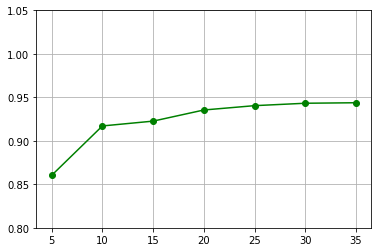

In [81]:
# зависимость качества от количества деревьев на данном датасете
nums_of_trees = np.arange(5,40,5)
results = []
for num in nums_of_trees:
    random_forest = ensemble.RandomForestClassifier(n_estimators=num)
    random_forest.fit(data, target)
    results.append(cross_val_score(random_forest, data, target,cv=10).mean())

pylab.grid()    
pylab.plot(nums_of_trees,results, 'g-', marker='o')    
pylab.ylim((0.8, 1.05))
print(results)

2) При очень маленьком числе деревьев (5, 10, 15), случайный лес работает хуже, чем при большем числе деревьев
3) С ростом количества деревьев в случайном лесе, в какой-то момент деревьев становится достаточно для высокого качества классификации, а затем качество существенно не меняется.

[0.9560366232153941, 0.9487957790192427, 0.9398758535071383, 0.9298572315332091]


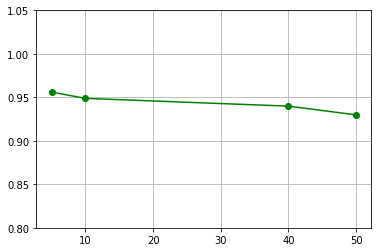

In [82]:
# зависимость качества от количества признаков на данном датасете
nums_of_features = [5,10,40,50]
results = []
for num in nums_of_features:
    random_forest = ensemble.RandomForestClassifier(max_features = num)
    random_forest.fit(data, target)
    results.append(cross_val_score(random_forest, data, target,cv=10).mean())

pylab.grid()    
pylab.plot(nums_of_features,results, 'g-', marker='o')    
pylab.ylim((0.8, 1.05))
print(results)


4) При большом количестве признаков (для данного датасета - 40, 50) качество классификации становится хуже, чем при малом количестве признаков (5, 10). Это связано с тем, что чем меньше признаков выбирается в каждом узле, тем более различными получаются деревья (ведь деревья сильно неустойчивы к изменениям в обучающей выборке), и тем лучше работает их композиция.

[0.9020391061452514, 0.9204003724394788, 0.952129112352576, 0.9437895716945995]


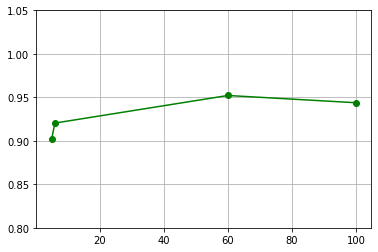

In [83]:
# зависимость качества от ограничения на глубину каждого дерева на данном датасете
nums_of_depth = [5,6,60,100]
results = []
for num in nums_of_depth:
    random_forest = ensemble.RandomForestClassifier(max_depth = num)
    random_forest.fit(data, target)
    results.append(cross_val_score(random_forest, data, target,cv=10).mean())

pylab.grid()    
pylab.plot(nums_of_depth,results, 'g-', marker='o')    
pylab.ylim((0.8, 1.05))
print(results)

7) При небольшой максимальной глубине деревьев (5-6) качество работы случайного леса заметно хуже, чем без ограничений, т.к. деревья получаются недообученными. С ростом глубины качество сначала улучшается, а затем не меняется существенно, т.к. из-за усреднения прогнозов и различий деревьев их переобученность в бэггинге не сказывается на итоговом качестве (все деревья преобучены по-разному, и при усреднении они компенсируют переобученность друг-друга).